# IN-STK 5000: Reproducibility assignment

Contributors:
Sebastian Sommerfelt - Rayyan Syed - Rohullah Akbari - Tellef Seierstad

Github for code: https://github.com/rohullaa/irisData

## Introduction


In assignment we set up a pipeline for classifying data using **scikitlearn**. 
At first we will pick a dataset and choose an algorithm. We then generate data 
with the same characteristics as the chosen dataset and use the generated data to tune some of the hyperparameters of the algorithm. Lastly, we train models using bootstrap replicates of our chosen dataset and report the accuracy on independent test sets.

## Dataset


We chose to use the iris dataset. The data set contains 3 classes, with 50 Samples each. The 3 classes referse to 3 different Iris plant types. 

Number of Samples: 150
Number of Attributes:4 numerical predictures and the Class vector

Attribute Information: 
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm
5. class:
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

Class distribution: 33.3% of for each class. Iris Setosa is linearly sepreble from the two other class namely Iris Versicolour and Iris Virginica.

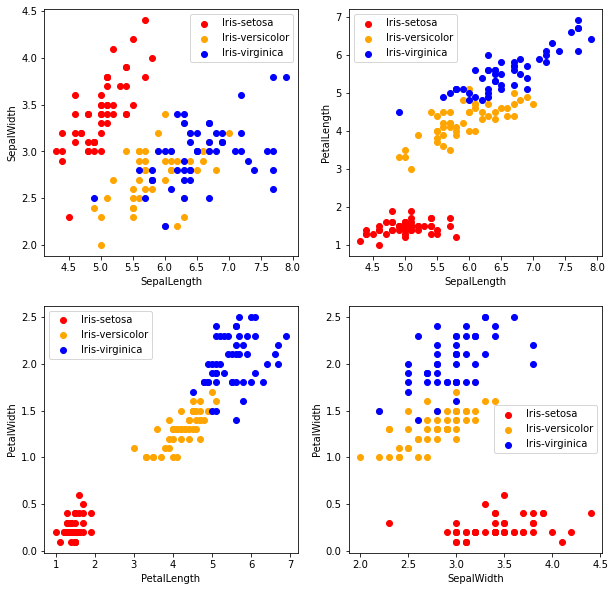

In [316]:
%run scatter_data.py

## Classifiers

In this assignment we use support vector machine (SVM) for classication. The hyperparamter we chose to tune are $\gamma$ and $C$.

## Generating new data

We will use the **scikitlearn**'s *make_classification* function to make a dataset which has the same characteristic as the iris dataset. In this we chose to make 1000 samples.

In [333]:
%run libraries.py

In [253]:
from sklearn.datasets import make_classification
def generation():
    X, Y = make_classification(n_samples=1000,n_features=4,n_classes=3,n_informative=4,n_redundant=0)
    return X,Y

## The experiment setup

In this section, we are choosing the best paramters using our chosen data generator. The artificially generated data  is of the same general characteristics as the dataset we have used, and we will use it to test the models performance by varying the hyperparamters. After tuning the parameters, we fit the a model using bootrapped samples which is generated using the original data.

The function **SVC_choose_gamma** takes the data and finds the best gamma from a list of chosen $\gamma$ holding $C$ at default value. Function **SVC_choose_C** does the same but it finds the best $C$ holding $\gamma$ at its default value. 

In [254]:
from find_parameters import SVC_choose_C,SVC_choose_gamma

To improve the robustness of our results, we repeat this process 100 times, and we choose the most frequent parameter value obtained during the experiment.

Printing the result:
Best gamma: 1
Best c: 10
The mean accuracy: 0.843


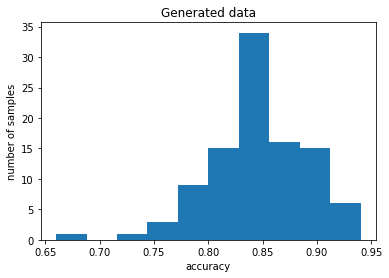

In [401]:
from collections import Counter

n_experiments = 100
gam_val = []
c_val = []

acc_generated= []
for _ in range(n_experiments):
    #getting the generated dataset
    X_g,Y_g = generation()
    X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, Y_g)
    bestModel = svm.SVC(gamma=SVC_choose_gamma(X_g, Y_g),C = SVC_choose_C(X_g, Y_g)).fit(X_g_train, y_g_train)
    y_g_pred = bestModel.predict(X_g_test)
    acc_generated.append(accuracy_score(y_g_test,y_g_pred))
    
    gam_val.append(SVC_choose_gamma(X_g, Y_g))
    c_val.append(SVC_choose_C(X_g, Y_g))
   

plt.hist(acc_generated)
plt.xlabel("accuracy")
plt.ylabel("number of samples")
plt.title("Generated data")

gam_val = Counter(gam_val)
c_val = Counter(c_val)
gamma_best = gam_val.most_common(1)[0][0]
c_best = c_val.most_common(1)[0][0]
print("Printing the result:")
print(f'Best gamma: {gamma_best}')
print(f'Best c: {c_best}')
print(f'The mean accuracy: {sum(acc_generated)/len(acc_generated):3.3f}')      

In the cell below, the data is being splitted in train and test sets. Then we will apply a bootstrapping method using the **resample** function from **sklearn.utils**. The model is trained with the bootstrap data using the paramters we found in the section above. This experiment is repeated 100 times, and concluded with a plot of the accuracies.

The mean accuracy: 0.953


Text(0.5, 1.0, 'Bootstrapped samples of iris')

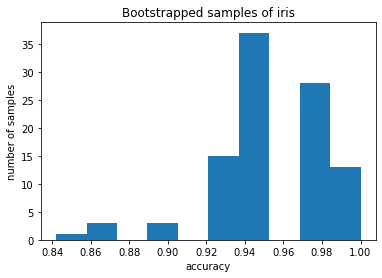

In [405]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
acc = []
for _ in range(n_experiments):
    #splitting the data:
    train,test = train_test_split(df,test_size=0.25)
    bs = resample(train , n_samples = 100,replace = True)

    X_bs_train, Y_bs_train = bs.iloc[:,:-1], bs.iloc[:,-1]
    X_bs_test, Y_bs_test = test.iloc[:,:-1], test.iloc[:,-1]
    
    #training and predicting using the best parameters:
    m = svm.SVC(gamma = gamma_best, C = c_best)
    bs_fit = m.fit(X_bs_train, Y_bs_train)
    Y_bs_pred = bs_fit.predict(X_bs_test)
    bs_accuracy = accuracy_score(Y_bs_pred, Y_bs_test)
    acc.append(bs_accuracy)
    
print(f'The mean accuracy: {sum(acc)/len(acc):3.3f}')      
plt.hist(acc)
plt.xlabel("accuracy")
plt.ylabel("number of samples")
plt.title("Bootstrapped samples of iris")

## Conclusion

In this assignment, we explored the concept of reproducibility and gain some practice in it. We started with generating a dataset of the same amount features and charactiristics as the original data, and used it to obtain an optimal classifier. Then we tried to reproduce the same results, ergo same accuracy, for new bootstrapped samples from the original data. As shown in the plot above, the accuracy for the reproduced model is quite good. We obtained a mean accuracy of 0.953 after 100 runs. This is due to the independencies in the data set (see the scatter plot above). It is easy to see that the classes are not dependent of each other. Therefore, by reproducing the optimal result we get quite good accuracy. This would not be the case if the classes were to dependent on each other, which would make the classification more complicated. 

By observing the histogram of the generated data, we can see that there is more variation between the accuracy score compared to the bootstrapped samples histogram. This means also that we get lower mean value for the accuracy for the generated data compared to the bootstrapped sample.  